In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib 
from matplotlib import pyplot as plt

In [2]:
churn = pd.read_excel('Customer Churn Data.xlsx')

In [3]:
churn.head()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,159.93,Mobile
1,20001,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,120.9,Mobile
2,20002,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,20003,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134.07,Mobile
4,20004,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,129.6,Mobile


In [4]:
churn.shape

(11260, 19)

In [4]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

In [5]:
churn.isna().sum()

AccountID                    0
Churn                        0
Tenure                     102
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         112
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

In [6]:
churn.columns

Index(['AccountID', 'Churn', 'Tenure', 'City_Tier', 'CC_Contacted_LY',
       'Payment', 'Gender', 'Service_Score', 'Account_user_count',
       'account_segment', 'CC_Agent_Score', 'Marital_Status', 'rev_per_month',
       'Complain_ly', 'rev_growth_yoy', 'coupon_used_for_payment',
       'Day_Since_CC_connect', 'cashback', 'Login_device'],
      dtype='object')

In [7]:
churn.duplicated().sum()

0

In [8]:
churn.describe()

,AccountID,Churn,City_Tier,CC_Contacted_LY,Service_Score,CC_Agent_Score,Complain_ly
count,11260.00000,11260.000000,11148.000000,11158.000000,11162.000000,11144.000000,10903.000000
mean,25629.50000,0.168384,1.653929,17.867091,2.902526,3.066493,0.285334
std,3250.62635,0.374223,0.915015,8.853269,0.725584,1.379772,0.451594
min,20000.00000,0.000000,1.000000,4.000000,0.000000,1.000000,0.000000
25%,22814.75000,0.000000,1.000000,11.000000,2.000000,2.000000,0.000000
50%,25629.50000,0.000000,1.000000,16.000000,3.000000,3.000000,0.000000
75%,28444.25000,0.000000,3.000000,23.000000,3.000000,4.000000,1.000000
max,31259.00000,1.000000,3.000000,132.000000,5.000000,5.000000,1.000000


In [9]:
churn.drop('AccountID', axis=1, inplace=True)

In [10]:
churn.head()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,159.93,Mobile
1,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,120.9,Mobile
2,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134.07,Mobile
4,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,129.6,Mobile


In [11]:
churn.shape

(11260, 18)

#### 1) Tenure: 
Tenure of account in months.

It is of numeric, but showing as object need check 

102 nulls should be treated

Anamoly need to be treated i.e., #

In [12]:
churn.Tenure.unique()

array([4, 0, 2, 13, 11, '#', 9, 99, 19, 20, 14, 8, 26, 18, 5, 30, 7, 1,
       23, 3, 29, 6, 28, 24, 25, 16, 10, 15, 22, nan, 27, 12, 21, 17, 50,
       60, 31, 51, 61], dtype=object)

In [13]:
churn.Tenure.value_counts()

1     1351
0     1231
8      519
9      496
7      450
10     423
3      410
5      403
4      403
11     388
6      363
12     360
13     359
2      354
14     345
15     311
16     291
19     273
18     253
20     217
17     215
21     170
23     169
22     151
24     147
28     137
30     137
27     131
99     131
26     122
#      116
25     114
29     114
31      96
50       2
60       2
51       2
61       2
Name: Tenure, dtype: int64

In [14]:
102/11260

0.009058614564831261

~1% of nulls are there

In [15]:
tenure_mode = churn['Tenure'].mode()
tenure_mode[0]
churn['Tenure'] = churn['Tenure'].fillna(tenure_mode[0])
churn['Tenure'].isnull().sum()

0

In [16]:
churn['Tenure'].describe()

count     11260
unique       38
top           1
freq       1453
Name: Tenure, dtype: int64

In [17]:
churn['Tenure'].replace('#', 1, inplace=True)

In [18]:
1231/11260

0.10932504440497336

Insights:

less variation in the data.

~11% of the accounts are having 0 months of the tenure. New customers' acounts.

Mean tenure is ~11 months.

75% of the customers have tenure less than or equal to 16 months.

#### 2) City_tier: 
Tier of primary customer's city

112 null need to be treated

In [19]:
churn['City_Tier'].unique()

array([ 3.,  1., nan,  2.])

In [20]:
churn['City_Tier'].value_counts()

1.0    7263
3.0    3405
2.0     480
Name: City_Tier, dtype: int64

In [21]:
tier_mode = churn['City_Tier'].mode()
tier_mode[0]
churn['City_Tier'] = churn['City_Tier'].fillna(tier_mode[0])
churn['City_Tier'].isnull().sum()

0

In [22]:
churn['City_Tier'].describe()

count    11260.000000
mean         1.647425
std          0.912763
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max          3.000000
Name: City_Tier, dtype: float64

In [24]:
7375/11260

0.6549733570159858

Insights:

3 types tier of cities are there

~65% of the customers are from the tier-1 cities. 

How to encourage tier-2, 3 cities people towards e-commerce business?

#### 3) CC_Contacted_LY: 
How many times all the customers of the account has contacted customer care in last 12months

Null need to be treated

In [23]:
churn['CC_Contacted_LY'].unique()

array([  6.,   8.,  30.,  15.,  12.,  22.,  11.,   9.,  31.,  18.,  13.,
        20.,  29.,  28.,  26.,  14.,  10.,  25.,  27.,  17.,  23.,  33.,
        19.,  35.,  24.,  16.,  32.,  21.,  nan,  34.,   5.,   4., 126.,
         7.,  36., 127.,  42.,  38.,  37.,  39.,  40.,  41., 132.,  43.,
       129.])

In [24]:
churn['CC_Contacted_LY'].value_counts()

14.0     682
16.0     663
9.0      655
13.0     655
15.0     623
12.0     571
8.0      538
17.0     525
11.0     524
10.0     489
7.0      391
18.0     374
19.0     364
20.0     319
6.0      311
21.0     310
22.0     282
23.0     241
24.0     214
25.0     197
32.0     192
29.0     181
28.0     178
34.0     178
30.0     175
27.0     174
26.0     169
35.0     165
31.0     165
33.0     155
36.0     148
37.0      96
38.0      73
39.0      55
40.0      46
42.0      30
41.0      29
43.0       8
5.0        8
127.0      1
126.0      1
132.0      1
4.0        1
129.0      1
Name: CC_Contacted_LY, dtype: int64

In [25]:
CC_mode = churn['CC_Contacted_LY'].mode()
CC_mode[0]
churn['CC_Contacted_LY'] = churn['CC_Contacted_LY'].fillna(CC_mode[0])
churn['CC_Contacted_LY'].isnull().sum()

0

In [26]:
churn['CC_Contacted_LY'].describe()

count    11260.000000
mean        17.832060
std          8.820689
min          4.000000
25%         11.000000
50%         16.000000
75%         23.000000
max        132.000000
Name: CC_Contacted_LY, dtype: float64

Insights:
    
There are outliers.

on an average, customers have called the company 18 times in last 12 months.

#### 4) Payment:
Preferred Payment mode of the customers in the account

Null treatment required



In [27]:
churn['Payment'].unique()

array(['Debit Card', 'UPI', 'Credit Card', 'Cash on Delivery', 'E wallet',
       nan], dtype=object)

In [28]:
churn['Payment'].value_counts()

Debit Card          4587
Credit Card         3511
E wallet            1217
Cash on Delivery    1014
UPI                  822
Name: Payment, dtype: int64

In [29]:
payment_mode = churn['Payment'].mode()
payment_mode[0]
churn['Payment'] = churn['Payment'].fillna(payment_mode[0])
churn['Payment'].isnull().sum()

0

In [30]:
churn['Payment'].describe()

count          11260
unique             5
top       Debit Card
freq            4696
Name: Payment, dtype: object

Insights:

~42% of the people payment via debit card.

~90% of the customers are preferring online payment mode.

In [33]:
1014/11260

0.09005328596802842

#### 5) Gender:
Gender of the primary customer of the account

Null treatment required

Anamoly treatment required

In [31]:
churn['Gender'].unique()

array(['Female', 'Male', 'F', nan, 'M'], dtype=object)

In [32]:
churn['Gender'].value_counts()

Male      6328
Female    4178
M          376
F          270
Name: Gender, dtype: int64

In [33]:
gender_mode = churn['Gender'].mode()
gender_mode[0]
churn['Gender'] = churn['Gender'].fillna(gender_mode[0])
churn['Gender'].isnull().sum()

0

In [34]:
churn['Gender'].replace('M', 'Male', inplace=True)
churn['Gender'].replace('F', 'Female', inplace=True)

In [35]:
churn['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [36]:
churn['Gender'].describe()

count     11260
unique        2
top        Male
freq       6812
Name: Gender, dtype: object

Insights:

Males are the having highest number of accounts i.e., ~60%.

In [40]:
6812/11260

0.6049733570159858

#### 6) Service_Score:
Satisfaction score given by customers of the account on service provided by company

Null treatment required

In [37]:
churn['Service_Score'].unique()

array([ 3.,  2.,  1., nan,  0.,  4.,  5.])

In [38]:
churn['Service_Score'].value_counts()

3.0    5490
2.0    3251
4.0    2331
1.0      77
0.0       8
5.0       5
Name: Service_Score, dtype: int64

In [39]:
ss_mode = churn['Service_Score'].mode()
ss_mode[0]
churn['Service_Score'] = churn['Service_Score'].fillna(ss_mode[0])
churn['Service_Score'].isnull().sum()

0

In [40]:
churn['Service_Score'].describe()

count    11260.000000
mean         2.903375
std          0.722476
min          0.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: Service_Score, dtype: float64

Insights:

Mean satisfaction score is 3, indicating that customers are satisfied with the company services.

It is also showing that 20% of the customers have good experience with the services, but at the same time ~30% of the customers suggesting for improvements are required.

Outstanding ratings are very very less, so company should need to improve on its services.

5– Outstanding, 4– Exceeds Expectations, 3- Meets Expectations, 2- Needs Improvement, 1- Unacceptable

In [45]:
2331/11260

0.20701598579040853

In [46]:
3251/11260

0.2887211367673179

#### 7) Account_user_count:
Number of customers tagged with this account

Null treatment required.

Anamoly treatment need to be done

In [41]:
churn['Account_user_count'].unique()

array([3, 4, nan, 5, 2, '@', 1, 6], dtype=object)

In [42]:
churn['Account_user_count'].value_counts()

4    4569
3    3261
5    1699
2     526
1     446
@     332
6     315
Name: Account_user_count, dtype: int64

In [43]:
users_mode = churn['Account_user_count'].mode()
users_mode[0]
churn['Account_user_count'] = churn['Account_user_count'].fillna(users_mode[0])
churn['Account_user_count'].isnull().sum()

0

In [44]:
churn['Account_user_count'].replace('@', 4, inplace=True)

In [45]:
churn['Account_user_count'].describe()

count    11260.000000
mean         3.704973
std          1.004383
min          1.000000
25%          3.000000
50%          4.000000
75%          4.000000
max          6.000000
Name: Account_user_count, dtype: float64

Insights:
    
On an average, 4 users are there per accounts.

#### 8) account_segment:
Account segmentation on the basis of spend

Null treatment required.

Anamoly treatment required.

In [46]:
churn['account_segment'].unique()

array(['Super', 'Regular Plus', 'Regular', 'HNI', 'Regular +', nan,
       'Super Plus', 'Super +'], dtype=object)

In [47]:
churn['account_segment'].value_counts(normalize=True)

Super           0.363881
Regular Plus    0.345964
HNI             0.146824
Super Plus      0.069067
Regular         0.046582
Regular +       0.023470
Super +         0.004210
Name: account_segment, dtype: float64

In [48]:
segment_mode = churn['account_segment'].mode()
segment_mode[0]
churn['account_segment'] = churn['account_segment'].fillna(segment_mode[0])
churn['account_segment'].isnull().sum()

0

In [49]:
churn['account_segment'].replace('Regular Plus', 'Regular +', inplace=True)

In [50]:
churn['account_segment'].replace('Super Plus', 'Super +', inplace=True)

In [51]:
churn['account_segment'].unique()

array(['Super', 'Regular +', 'Regular', 'HNI', 'Super +'], dtype=object)

Insights:

Hierarchy is as follow: Regular, Regular +, Super, Super +, HNI

~60% of the customers are on high payments side segment.

In [58]:
6616/11260

0.5875666074600355

#### 9) CC_Agent_Score:
Satisfaction score given by customers of the account on customer care service provided by company

Null treatment required.

In [53]:
churn['CC_Agent_Score'].unique()

array([ 2.,  3.,  5.,  4., nan,  1.])

In [54]:
churn['CC_Agent_Score'].value_counts()

3.0    3360
1.0    2302
5.0    2191
4.0    2127
2.0    1164
Name: CC_Agent_Score, dtype: int64

In [55]:
cs_mode = churn['CC_Agent_Score'].mode()
cs_mode[0]
churn['CC_Agent_Score'] = churn['CC_Agent_Score'].fillna(cs_mode[0])
churn['CC_Agent_Score'].isnull().sum()

0

In [56]:
churn['CC_Agent_Score'].describe()

count    11260.000000
mean         3.065808
std          1.372663
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: CC_Agent_Score, dtype: float64

Insights:

There are 5 kinds of rating scores taken into consideration.

3 is mean score given by the customers of the account.

~70% of the customers are on meets expectations to exceed expectations side.

In [65]:
7794/11260

0.6921847246891651

#### 10) Marital_Status
Marital status of the primary customer of the account

Null treatment required.

In [57]:
churn['Marital_Status'].unique()

array(['Single', 'Divorced', 'Married', nan], dtype=object)

In [58]:
churn['Marital_Status'].value_counts()

Married     5860
Single      3520
Divorced    1668
Name: Marital_Status, dtype: int64

In [59]:
marital_mode = churn['Marital_Status'].mode()
marital_mode[0]
churn['Marital_Status'] = churn['Marital_Status'].fillna(marital_mode[0])
churn['Marital_Status'].isnull().sum()

0

Insights:

~54% of the customers are of married category.

And ~31% of the customers are single.

Need to focus more on the products they choose so that company focus different product offers to different marital customers.

In [69]:
3520/11260

0.31261101243339257

#### 11) rev_per_month
Monthly average revenue generated by account in last 12 months

Null treatment required.

Anamoly treatment required.

In [60]:
churn['rev_per_month'].unique()

array([9, 7, 6, 8, 3, 2, 4, 10, 1, 5, '+', 130, nan, 19, 139, 102, 120,
       138, 127, 123, 124, 116, 21, 126, 134, 113, 114, 108, 140, 133,
       129, 107, 118, 11, 105, 20, 119, 121, 137, 110, 22, 101, 136, 125,
       14, 13, 12, 115, 23, 122, 117, 131, 104, 15, 25, 135, 111, 109,
       100, 103], dtype=object)

In [61]:
churn['rev_per_month'].replace('+', 3, inplace=True)

In [62]:
churn['rev_per_month'].value_counts()

3.0      2435
2.0      1585
5.0      1337
4.0      1218
6.0      1085
7.0       754
8.0       643
9.0       564
10.0      413
1.0       402
11.0      278
12.0      166
13.0       93
14.0       48
15.0       24
102.0       8
124.0       5
107.0       5
123.0       5
140.0       4
118.0       4
129.0       4
133.0       4
136.0       4
117.0       3
108.0       3
101.0       3
116.0       3
110.0       3
137.0       3
119.0       3
115.0       3
138.0       3
130.0       3
126.0       3
113.0       3
127.0       3
19.0        2
139.0       2
120.0       2
131.0       2
22.0        2
125.0       2
121.0       2
105.0       2
114.0       2
134.0       2
20.0        1
23.0        1
122.0       1
104.0       1
21.0        1
25.0        1
135.0       1
111.0       1
109.0       1
100.0       1
103.0       1
Name: rev_per_month, dtype: int64

In [63]:
rpm_mode = churn['rev_per_month'].mode()
rpm_mode[0]
churn['rev_per_month'] = churn['rev_per_month'].fillna(rpm_mode[0])
churn['rev_per_month'].isnull().sum()

0

In [64]:
churn['rev_per_month'].describe()

count    11260.000000
mean         6.126377
std         11.515823
min          1.000000
25%          3.000000
50%          4.000000
75%          7.000000
max        140.000000
Name: rev_per_month, dtype: float64

Insights:
    
There is variation with outliers to consider.

Mean revenue is 6.1.

High revenue generating customers are very less.

#### 12) Complain_ly:
Any complaints has been raised by account in last 12 months

Null treatment required.

In [65]:
churn['Complain_ly'].unique()

array([ 1.,  0., nan])

In [66]:
churn['Complain_ly'].value_counts()

0.0    7792
1.0    3111
Name: Complain_ly, dtype: int64

In [67]:
com_mode = churn['Complain_ly'].mode()
com_mode[0]
churn['Complain_ly'] = churn['Complain_ly'].fillna(com_mode[0])
churn['Complain_ly'].isnull().sum()

0

In [68]:
churn['Complain_ly'].describe()

count    11260.000000
mean         0.276288
std          0.447181
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: Complain_ly, dtype: float64

Insights:

~28% of the customers have raised the complaints in last 12 months.

In [79]:
8149/11260

0.7237122557726465

#### 13) rev_growth_yoy:
revenue growth percentage of the account (last 12 months vs last 24 to 13 
month)

Anamoly treatment required.

In [69]:
churn['rev_growth_yoy'].unique()

array([11, 15, 14, 23, 22, 16, 12, 13, 17, 18, 24, 19, 20, 21, 25, 26,
       '$', 4, 27, 28], dtype=object)

In [70]:
churn['rev_growth_yoy'].value_counts()

14    1524
13    1427
15    1283
12    1210
16     949
18     708
17     704
19     619
20     562
11     523
21     433
22     403
23     345
24     229
25     188
26      98
27      35
28      14
$        3
4        3
Name: rev_growth_yoy, dtype: int64

In [71]:
rgy_mode = churn['rev_growth_yoy'].mode()
rgy_mode[0]
churn['rev_growth_yoy'] = churn['rev_growth_yoy'].fillna(rgy_mode[0])
churn['rev_growth_yoy'].isnull().sum()

0

In [72]:
churn['rev_growth_yoy'].replace('$', 14, inplace=True)

In [73]:
churn['rev_growth_yoy'].describe()

count    11260.000000
mean        16.192806
std          3.757391
min          4.000000
25%         13.000000
50%         15.000000
75%         19.000000
max         28.000000
Name: rev_growth_yoy, dtype: float64

Insights:

Mean growth percentage is ~16%

#### 14) coupon_used_for_payment:
How many times customers have used coupons to do the payment in last 12 
months

Anamoly treatment required.

In [85]:
churn['coupon_used_for_payment'].unique()

array([1, 0, 4, 2, 9, 6, 11, 7, 12, 10, 5, 3, 13, 15, 8, '#', '$', 14,
       '*', 16], dtype=object)

In [86]:
churn['coupon_used_for_payment'].value_counts()

1     4373
2     2656
0     2150
3      698
4      424
5      284
6      234
7      184
8       88
10      34
9       34
11      30
12      26
13      22
14      12
15       4
16       4
#        1
$        1
*        1
Name: coupon_used_for_payment, dtype: int64

In [74]:
churn['coupon_used_for_payment'].replace('#', 1, inplace=True)
churn['coupon_used_for_payment'].replace('$', 1, inplace=True)
churn['coupon_used_for_payment'].replace('*', 1, inplace=True)

In [75]:
churn['coupon_used_for_payment'].describe()

count    11260.000000
mean         1.790409
std          1.969331
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         16.000000
Name: coupon_used_for_payment, dtype: float64

Insights:

On an average, customers have used coupons 2 times to make the payment.

~50% of the customers used 1 or 2 times.

#### 15) Day_Since_CC_connect:
Number of days since no customers in the account has contacted the customer care

Null treatment required.

Anamoly treatment required.

In [76]:
churn['Day_Since_CC_connect'].unique()

array([5, 0, 3, 7, 2, 1, 8, 6, 4, 15, nan, 11, 10, 9, 13, 12, 17, 16, 14,
       30, '$', 46, 18, 31, 47], dtype=object)

In [77]:
churn['Day_Since_CC_connect'].value_counts()

3     1816
2     1574
1     1256
8     1169
0      964
7      911
4      893
9      622
5      479
10     339
6      229
11     183
12     146
13     117
14      74
15      37
17      34
16      26
18      26
30       2
31       2
47       2
$        1
46       1
Name: Day_Since_CC_connect, dtype: int64

In [78]:
churn['Day_Since_CC_connect'].replace('$', 3, inplace=True)

In [79]:
daycc_mean = churn['Day_Since_CC_connect'].mean()
daycc_mean
churn['Day_Since_CC_connect'] = churn['Day_Since_CC_connect'].fillna(daycc_mean)
churn['Day_Since_CC_connect'].isnull().sum()

0

In [80]:
churn['Day_Since_CC_connect'].describe()

count    11260.000000
mean         4.633037
std          3.638408
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max         47.000000
Name: Day_Since_CC_connect, dtype: float64

Insights:

On an average, none of the customers have called customers care in last 5 days.

#### 16) cashback:
Monthly average cashback generated by account in last 12 months

Null treatment required.

Anamoly treatment required.

In [81]:
churn['cashback'].unique()

array([159.93, 120.9, nan, ..., 227.36, 226.91, 191.42], dtype=object)

In [82]:
churn['cashback'].value_counts()

155.62    10
149.36     9
154.73     9
145.08     9
149.68     9
          ..
131.55     1
245.64     1
130.78     1
299.72     1
191.42     1
Name: cashback, Length: 5693, dtype: int64

In [83]:
churn['cashback'].replace('$', 165, inplace=True)

In [84]:
cashback_median = churn['cashback'].median()
cashback_median
churn['cashback'] = churn['cashback'].fillna(cashback_median)
churn['cashback'].isnull().sum()

0

In [86]:
cashback_median

165.24

In [85]:
churn['cashback'].describe()

count    11260.000000
mean       194.934259
std        174.977944
min          0.000000
25%        147.890000
50%        165.240000
75%        197.310000
max       1997.000000
Name: cashback, dtype: float64

Insights:

Mean monthly cashback per account is ~196.

#### 17) Login_device:
Preferred login device of the customers in the account

Null treatment required.

Anamoly treatment required.

In [87]:
churn['Login_device'].unique()

array(['Mobile', 'Computer', '&&&&', nan], dtype=object)

In [88]:
churn['Login_device'].value_counts()

Mobile      7482
Computer    3018
&&&&         539
Name: Login_device, dtype: int64

In [89]:
login_mode = churn['Login_device'].mode()
login_mode[0]
churn['Login_device'] = churn['Login_device'].fillna(login_mode[0])
churn['Login_device'].isnull().sum()

0

In [90]:
churn['Login_device'].replace('&&&&', 'Mobile', inplace=True)

Insights:

~73% of the customers are of mobile users.

In [105]:
8242/11260

0.7319715808170515

#### 18) Churn

In [91]:
round(churn['Churn'].value_counts(normalize=True),2)

0    0.83
1    0.17
Name: Churn, dtype: float64

?

In [92]:
churn.dtypes

Churn                        int64
Tenure                       int64
City_Tier                  float64
CC_Contacted_LY            float64
Payment                     object
Gender                      object
Service_Score              float64
Account_user_count           int64
account_segment             object
CC_Agent_Score             float64
Marital_Status              object
rev_per_month              float64
Complain_ly                float64
rev_growth_yoy               int64
coupon_used_for_payment      int64
Day_Since_CC_connect       float64
cashback                   float64
Login_device                object
dtype: object

In [93]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  int64  
 1   Tenure                   11260 non-null  int64  
 2   City_Tier                11260 non-null  float64
 3   CC_Contacted_LY          11260 non-null  float64
 4   Payment                  11260 non-null  object 
 5   Gender                   11260 non-null  object 
 6   Service_Score            11260 non-null  float64
 7   Account_user_count       11260 non-null  int64  
 8   account_segment          11260 non-null  object 
 9   CC_Agent_Score           11260 non-null  float64
 10  Marital_Status           11260 non-null  object 
 11  rev_per_month            11260 non-null  float64
 12  Complain_ly              11260 non-null  float64
 13  rev_growth_yoy           11260 non-null  int64  
 14  coupon_used_for_paymen

In [94]:
churn.isna().sum()

Churn                      0
Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Payment                    0
Gender                     0
Service_Score              0
Account_user_count         0
account_segment            0
CC_Agent_Score             0
Marital_Status             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback                   0
Login_device               0
dtype: int64

In [95]:
churn.shape

(11260, 18)

Data cleaning done

In [96]:
churn.describe()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Service_Score,Account_user_count,CC_Agent_Score,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback
count,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000
mean,0.168384,10.830995,1.647425,17.832060,2.903375,3.704973,3.065808,6.126377,0.276288,16.192806,1.790409,4.633037,194.934259
std,0.374223,12.829072,0.912763,8.820689,0.722476,1.004383,1.372663,11.515823,0.447181,3.757391,1.969331,3.638408,174.977944
min,0.000000,0.000000,1.000000,4.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,1.000000,11.000000,2.000000,3.000000,2.000000,3.000000,0.000000,13.000000,1.000000,2.000000,147.890000
50%,0.000000,8.000000,1.000000,16.000000,3.000000,4.000000,3.000000,4.000000,0.000000,15.000000,1.000000,4.000000,165.240000
75%,0.000000,16.000000,3.000000,23.000000,3.000000,4.000000,4.000000,7.000000,1.000000,19.000000,2.000000,7.000000,197.310000
max,1.000000,99.000000,3.000000,132.000000,5.000000,6.000000,5.000000,140.000000,1.000000,28.000000,16.000000,47.000000,1997.000000


In [98]:
num = ['Tenure', 'CC_Contacted_LY', 'rev_per_month', 'rev_growth_yoy', 'Day_Since_CC_connect', 'coupon_used_for_payment', 'cashback']

In [104]:
discrete = ['Churn', 'City_Tier', 'Service_Score', 'Account_user_count', 'CC_Agent_Score', 'Complain_ly']

In [111]:
range(len(discrete))

range(0, 6)

#### Univariate analysis:

array([[<AxesSubplot:title={'center':'Tenure'}>,
        <AxesSubplot:title={'center':'CC_Contacted_LY'}>,
        <AxesSubplot:title={'center':'rev_per_month'}>],
       [<AxesSubplot:title={'center':'rev_growth_yoy'}>,
        <AxesSubplot:title={'center':'Day_Since_CC_connect'}>,
        <AxesSubplot:title={'center':'coupon_used_for_payment'}>],
       [<AxesSubplot:title={'center':'cashback'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

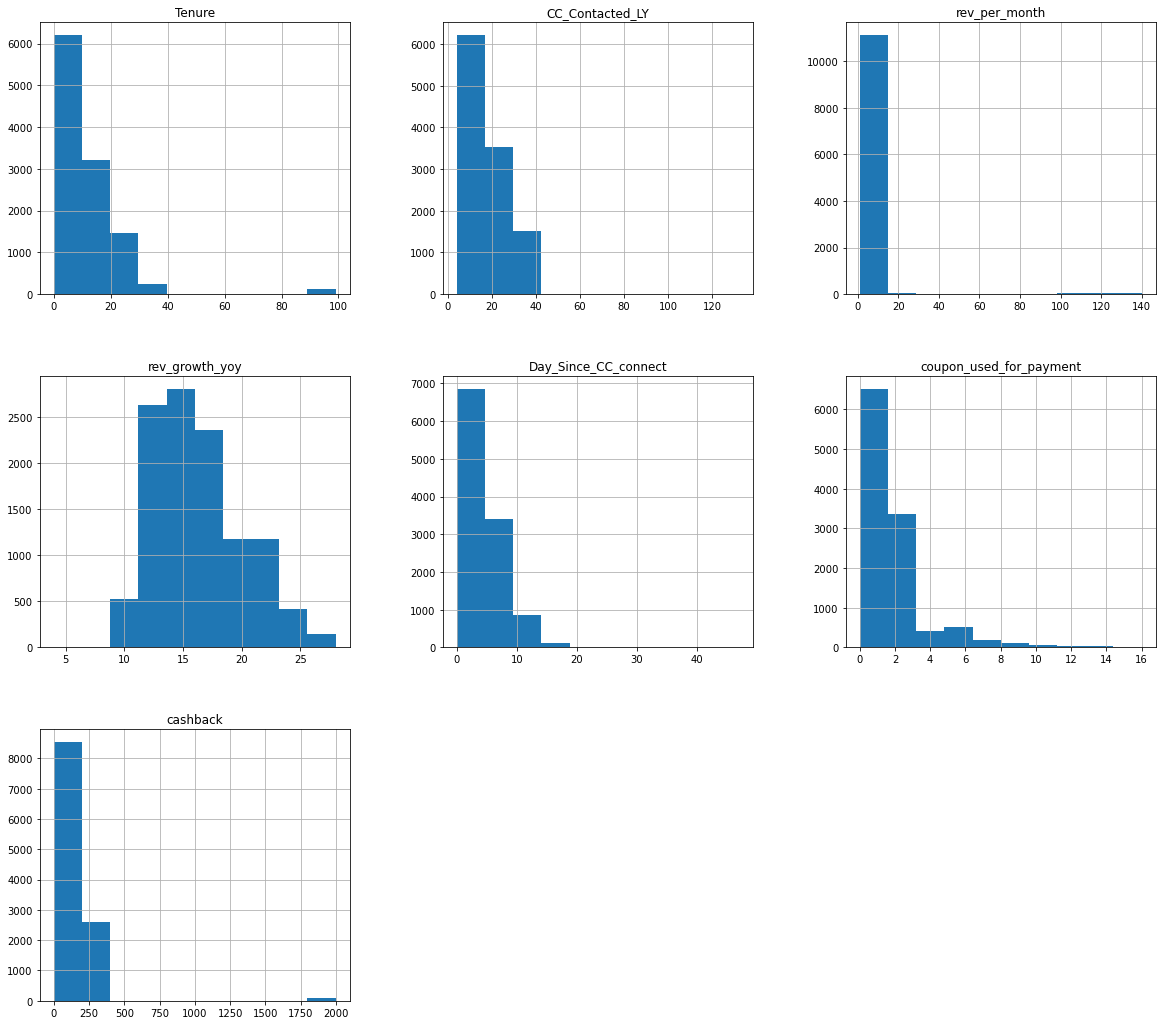

In [99]:
churn[num].hist(figsize=(20,18))

In [100]:
churn[num].skew()

Tenure                     3.901903
CC_Contacted_LY            1.436919
rev_per_month              9.412240
rev_growth_yoy             0.752886
Day_Since_CC_connect       1.293829
coupon_used_for_payment    2.575680
cashback                   8.966070
dtype: float64

Interpretations:

No normally distributed variables

Highly right skewed variables: Tenure, rev_per_month, cashback

Moderately right skewed variables: CC_Contacted_LY, rev_growth_yoy, coupon_used_for_payment, Day_since_CC_connect

In [102]:
object = churn.select_dtypes(include=['object']).columns
range(len(object))

range(0, 5)

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\U

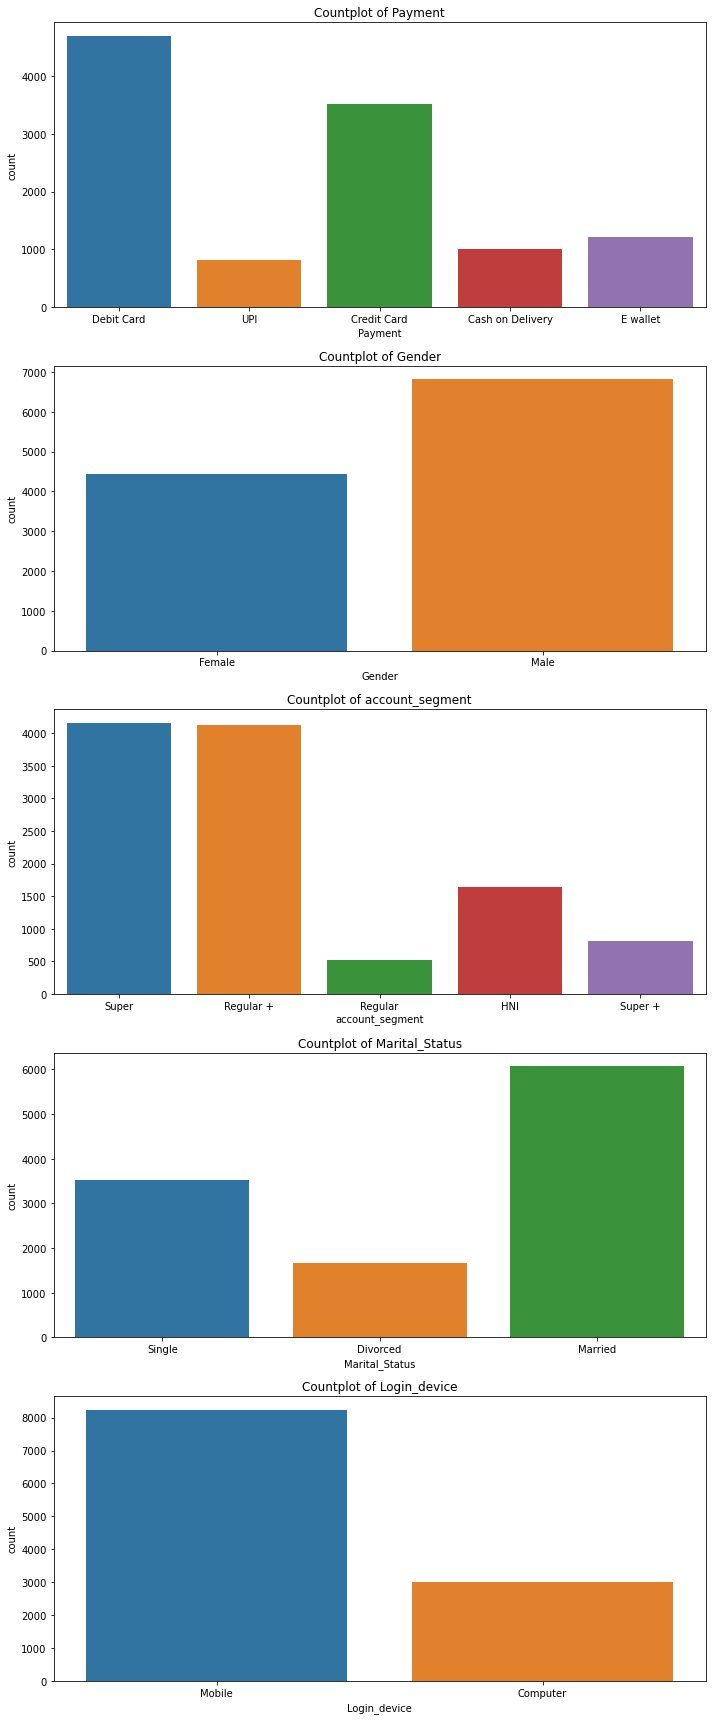

In [103]:
plt.figure(figsize=(10,24))
for i in range(len(object)):
    plt.subplot(5, 1, i + 1)
    sns.countplot(churn[object[i]], data = churn)
    plt.title('Countplot of {}'.format(object[i]))
    plt.tight_layout()

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\U

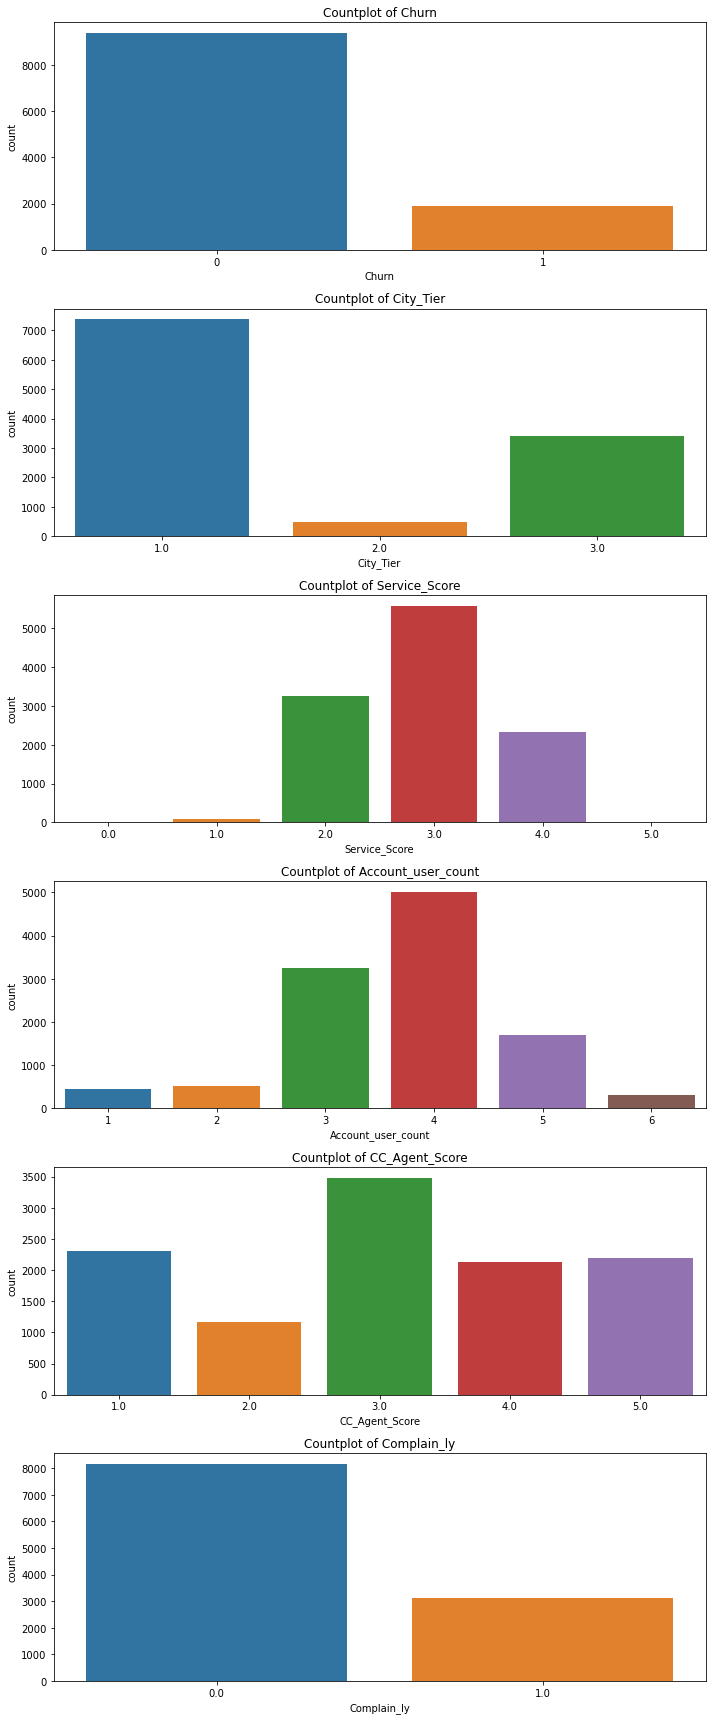

In [114]:
plt.figure(figsize=(10,24))
for i in range(len(discrete)):
    plt.subplot(6, 1, i + 1)
    sns.countplot(churn[discrete[i]], data = churn)
    plt.title('Countplot of {}'.format(discrete[i]))
    plt.tight_layout()

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\U

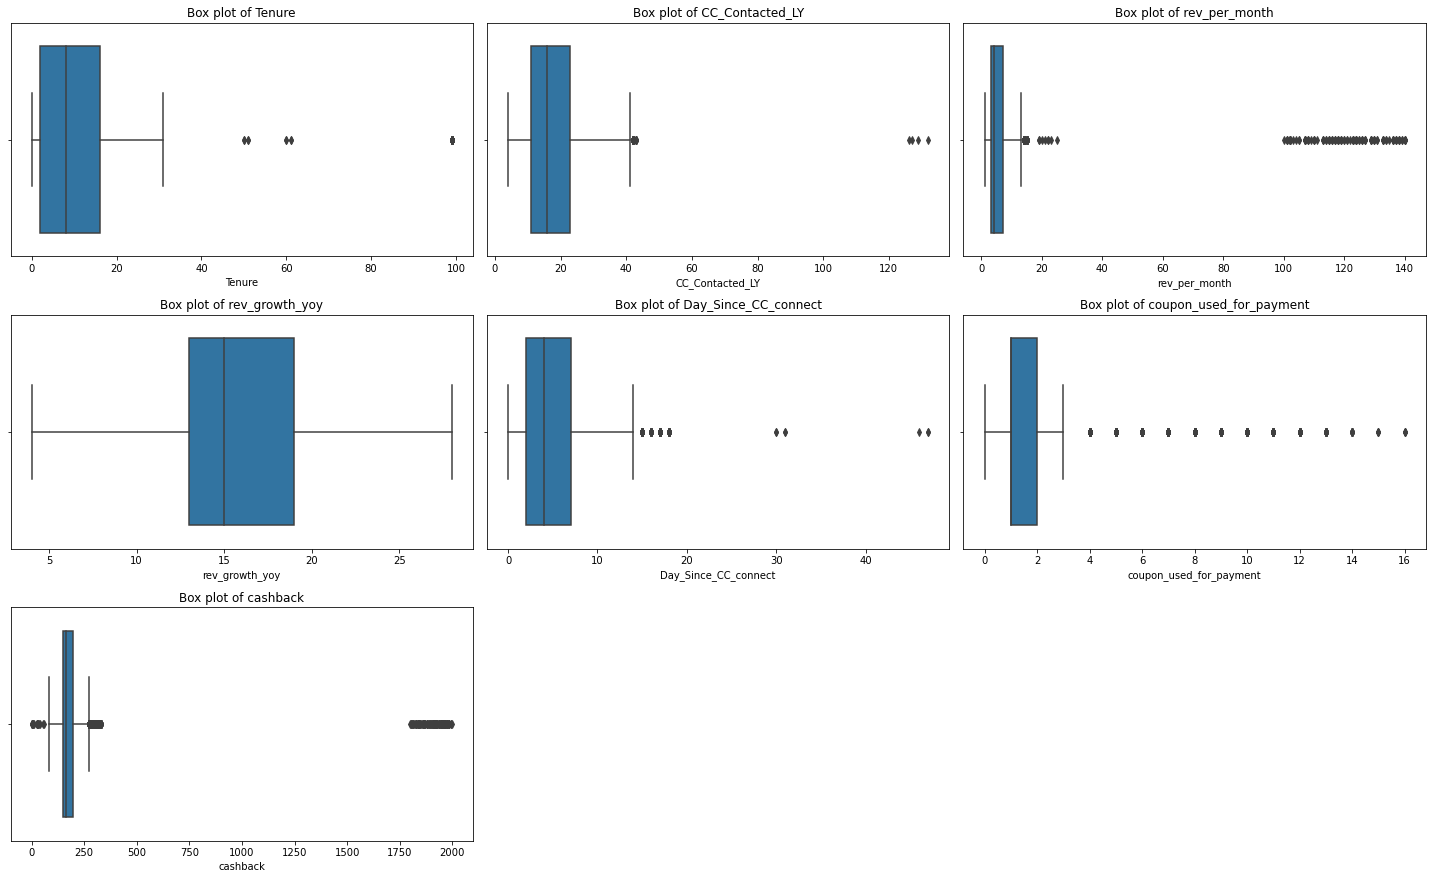

In [115]:
plt.figure(figsize=(20,20))
for i in range(len(num)):
    plt.subplot(5,3,i+1)
    sns.boxplot(churn[num[i]], data=churn)
    plt.title('Box plot of {}' .format(num[i]))
    plt.tight_layout()

Outliers are present in all the variables except rev_growth_yoy, CC_Agent_Score, City_Tier

In [116]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range    

In [118]:
for column in num:
    lr,ur=remove_outlier(churn[column])
    churn[column]=np.where(churn[column]>ur,ur,churn[column])
    churn[column]=np.where(churn[column]<lr,lr,churn[column])

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\U

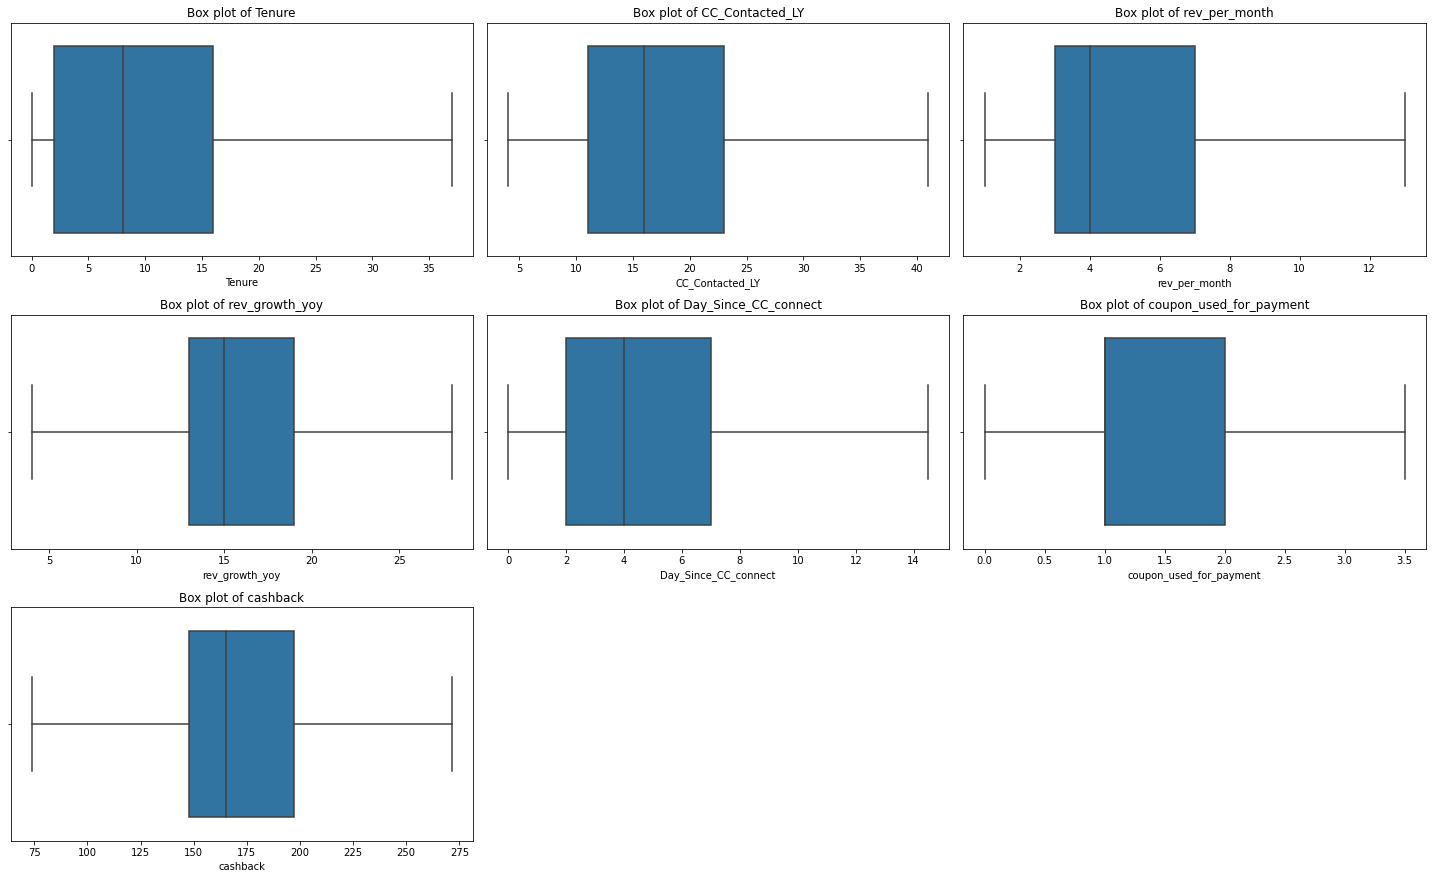

In [119]:
plt.figure(figsize=(20,20))
for i in range(len(num)):
    plt.subplot(5,3,i+1)
    sns.boxplot(churn[num[i]], data=churn)
    plt.title('Box plot of {}' .format(num[i]))
    plt.tight_layout()

#### Bivariate analysis

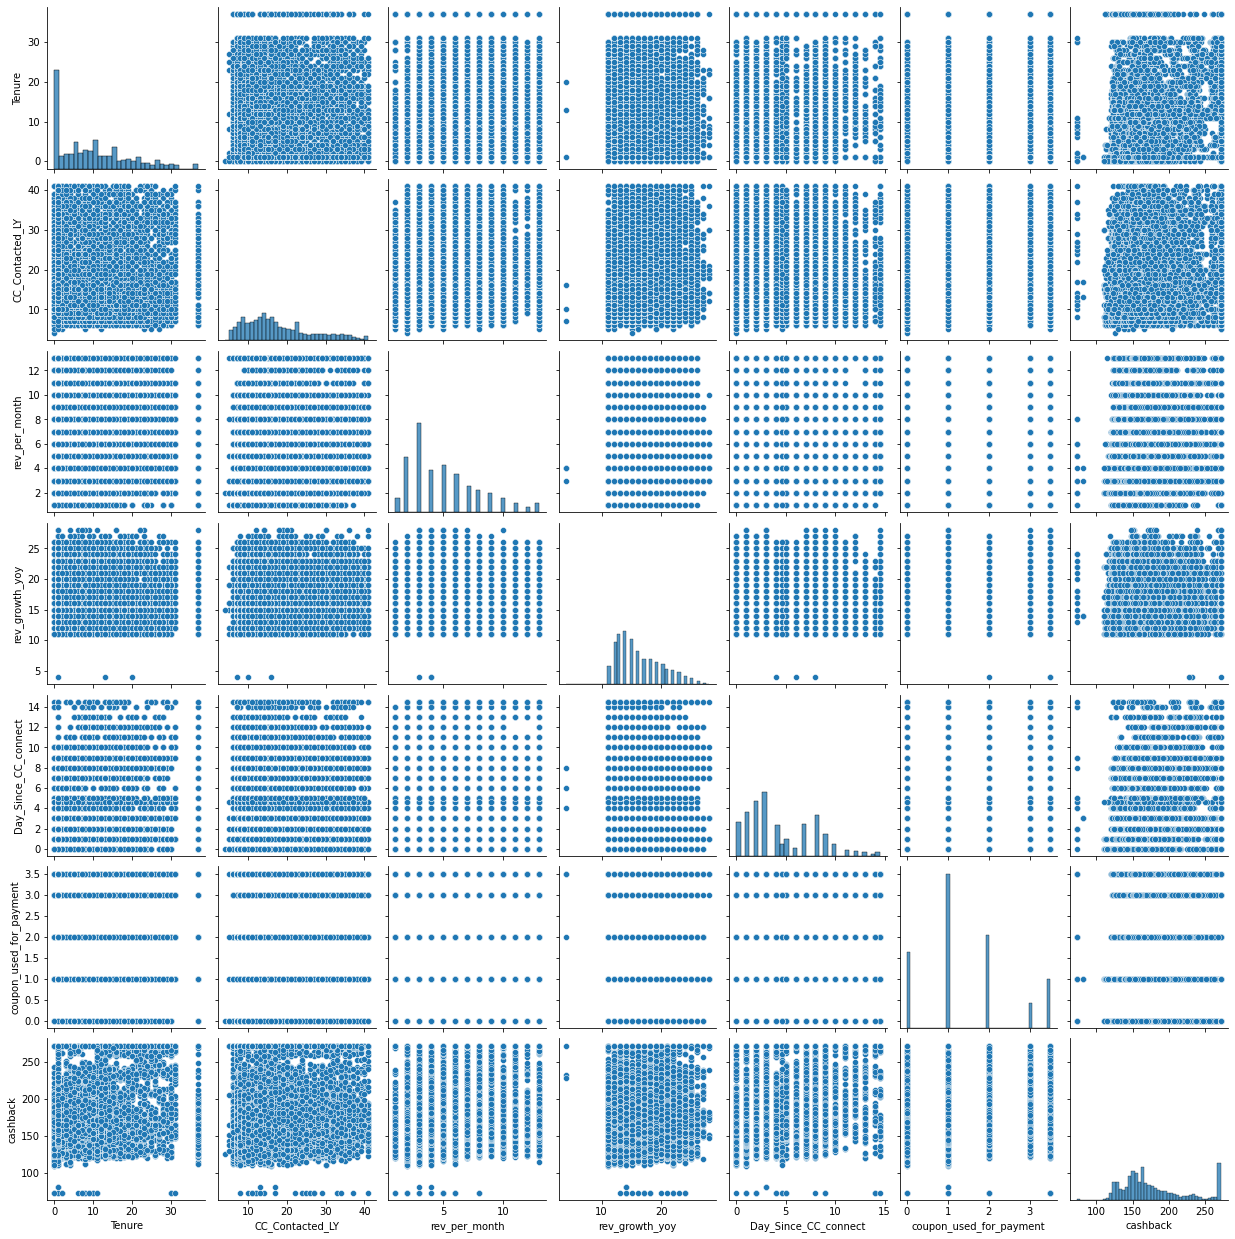

In [126]:
sns.pairplot(churn[num]);

<AxesSubplot:>

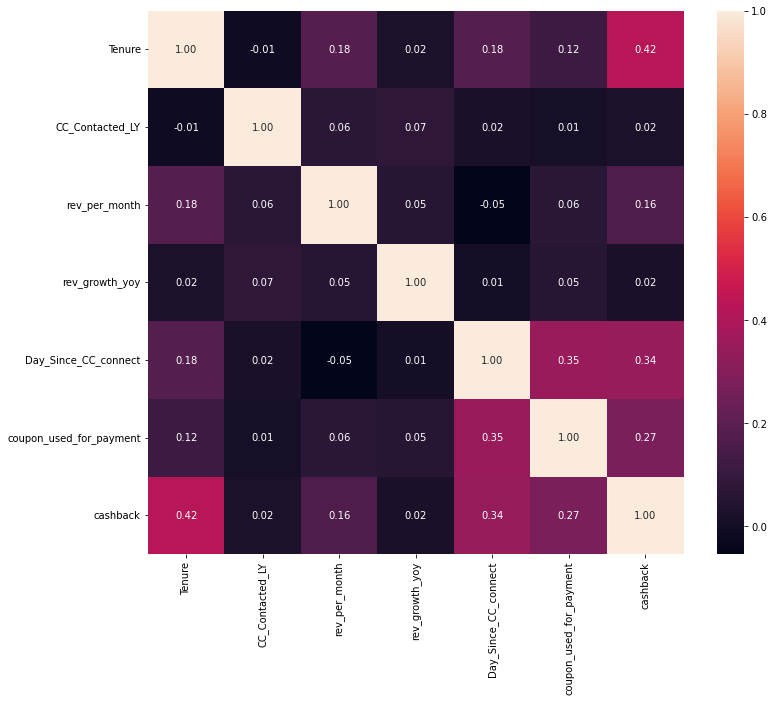

In [127]:
plt.figure(figsize=(12,10))
sns.heatmap(churn[num].corr(), annot=True, fmt='.2f')

In [124]:
churn['coupon_used_for_payment'].value_counts()

1.0    4376
2.0    2656
0.0    2150
3.5    1380
3.0     698
Name: coupon_used_for_payment, dtype: int64

In [125]:
churn['coupon_used_for_payment'].replace(3.5, 3.0, inplace=True)

In [126]:
churn['coupon_used_for_payment'].value_counts()

1.0    4376
2.0    2656
0.0    2150
3.0    2078
Name: coupon_used_for_payment, dtype: int64

In [127]:
churn2 = churn.copy()

In [128]:
churn2.to_csv('churn2.csv')

In [129]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  int64  
 1   Tenure                   11260 non-null  float64
 2   City_Tier                11260 non-null  float64
 3   CC_Contacted_LY          11260 non-null  float64
 4   Payment                  11260 non-null  object 
 5   Gender                   11260 non-null  object 
 6   Service_Score            11260 non-null  float64
 7   Account_user_count       11260 non-null  int64  
 8   account_segment          11260 non-null  object 
 9   CC_Agent_Score           11260 non-null  float64
 10  Marital_Status           11260 non-null  object 
 11  rev_per_month            11260 non-null  float64
 12  Complain_ly              11260 non-null  float64
 13  rev_growth_yoy           11260 non-null  float64
 14  coupon_used_for_paymen